In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [5]:
df =pd.read_csv(r'C:\Users\adity\Documents\machine learning\Linear Regression\Datasets\data.csv')
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [9]:
df.head() # to see how data looks like

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [10]:
df.shape # to see the shape of the data

(6, 3)

In [11]:
df.info() # to see the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sno          6 non-null      int64  
 1   Temperature  6 non-null      int64  
 2   Pressure     6 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 276.0 bytes


In [12]:
df.describe().T #statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
sno,6.0,3.500000,1.870829,1.0000,2.2500,3.500,4.750,6.00
Temperature,6.0,50.000000,37.416574,0.0000,25.0000,50.000,75.000,100.00
Pressure,6.0,0.066233,0.105467,0.0002,0.0024,0.018,0.075,0.27


In [13]:
df.isnull().sum() # to see if there are any missing values in the data

sno            0
Temperature    0
Pressure       0
dtype: int64

In [14]:
df.duplicated().sum() # to see if there are any duplicate values in the data

np.int64(0)

In [16]:
df.drop('sno',axis=1,inplace=True) # to remove the duplicate values

In [17]:
col = df.columns.tolist() # to see the columns of the data
col

['Temperature', 'Pressure']

Temperature


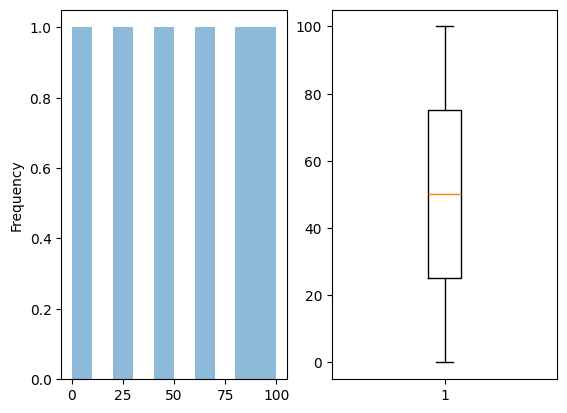

Pressure


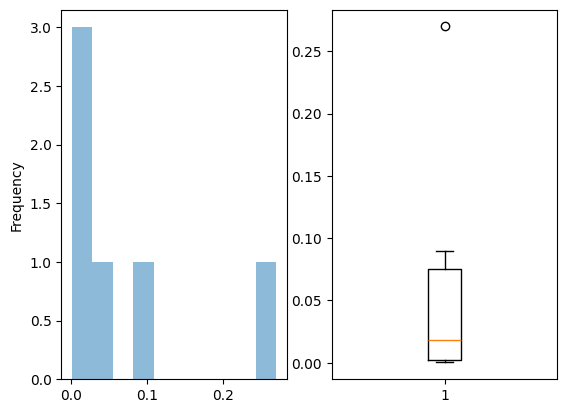

In [18]:
for i in col:
    print(i)
    plt.subplot(1,2,1)
    df[i].plot(kind='hist',bins=10,alpha=0.5)
    
    plt.subplot(1,2,2)
    plt.boxplot(df[i])
    
    plt.show()  # to see the distribution of the data

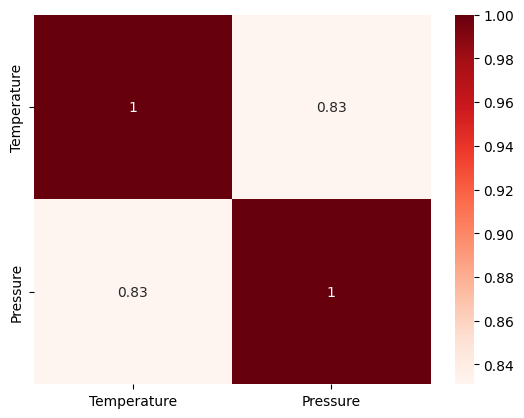

In [21]:
corr = df[col].corr(method='pearson') # to see the correlation between the data
sns.heatmap(corr,annot=True,cmap='Reds') 
plt.show()

In [23]:
# Feature and the target variable
X=df[['Temperature']]
y=df[['Pressure']]

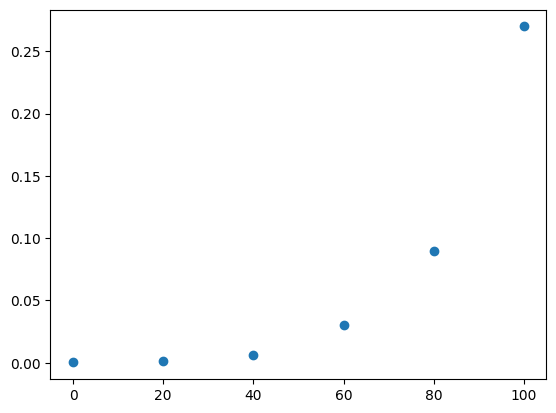

In [24]:
plt.scatter(X,y)
plt.show()

In [25]:
# fittinhg linear regression to the dataset
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [26]:
y_pred = model.predict(X)
y_pred

array([[-0.05086667],
       [-0.00402667],
       [ 0.04281333],
       [ 0.08965333],
       [ 0.13649333],
       [ 0.18333333]])

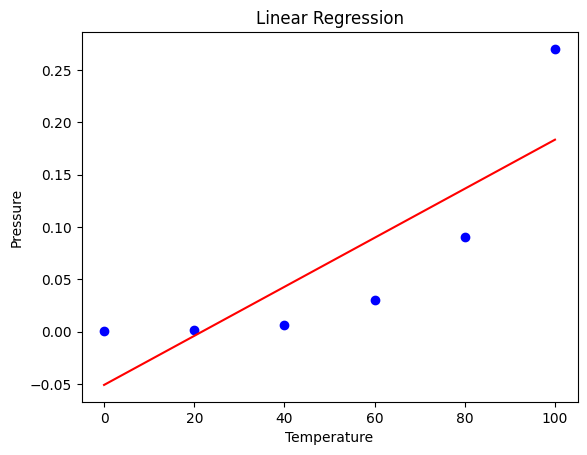

In [28]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')
plt.plot(X,y_pred, color = 'red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

In [31]:
# Fitting polynomial reggression to the dataset
poly = PolynomialFeatures(degree=5,include_bias=True)
X_poly = poly.fit_transform(X)
poly.fit(X_poly,y)

model1 = LinearRegression() 
model1.fit(X_poly,y)

LinearRegression()

In [ ]:
y_pred = model1.predict(poly.fit_transform(X))
y_pred 

array([[2.00000314e-04],
       [1.20000006e-03],
       [5.99999994e-03],
       [2.99999999e-02],
       [8.99999998e-02],
       [2.70000000e-01]])

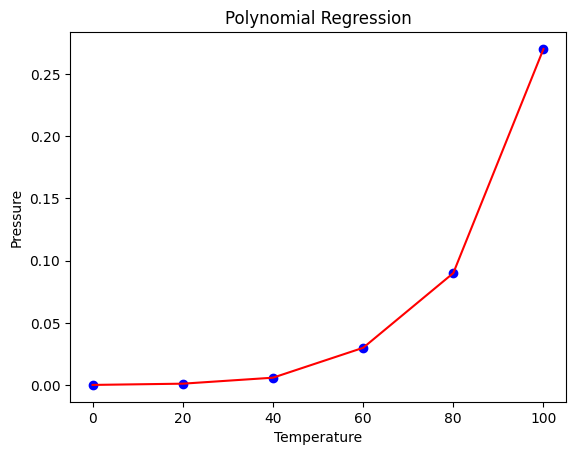

In [34]:
# Visualising the polynomial Regression to the dataset
plt.scatter(X, y, color = 'blue')
plt.plot(X,y_pred, color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

In [35]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# create polynomial Reghression model
degree = 5 # specify the drgree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

In [47]:
# fit the polynoimal regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [48]:
# Make predictions
y_pred = model.predict(X_train_poly)

In [49]:
# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2_train = r2_score(y_train, y_pred)
print('Train RMSE:', train_rmse)
print('Train R2 Score:', r2_train)


Train RMSE: 1.1210126175528405e-16
Train R2 Score: 1.0
